In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


In [4]:
ligandy = Chem.SmilesMolSupplier('AMCase.smi', titleLine=False)

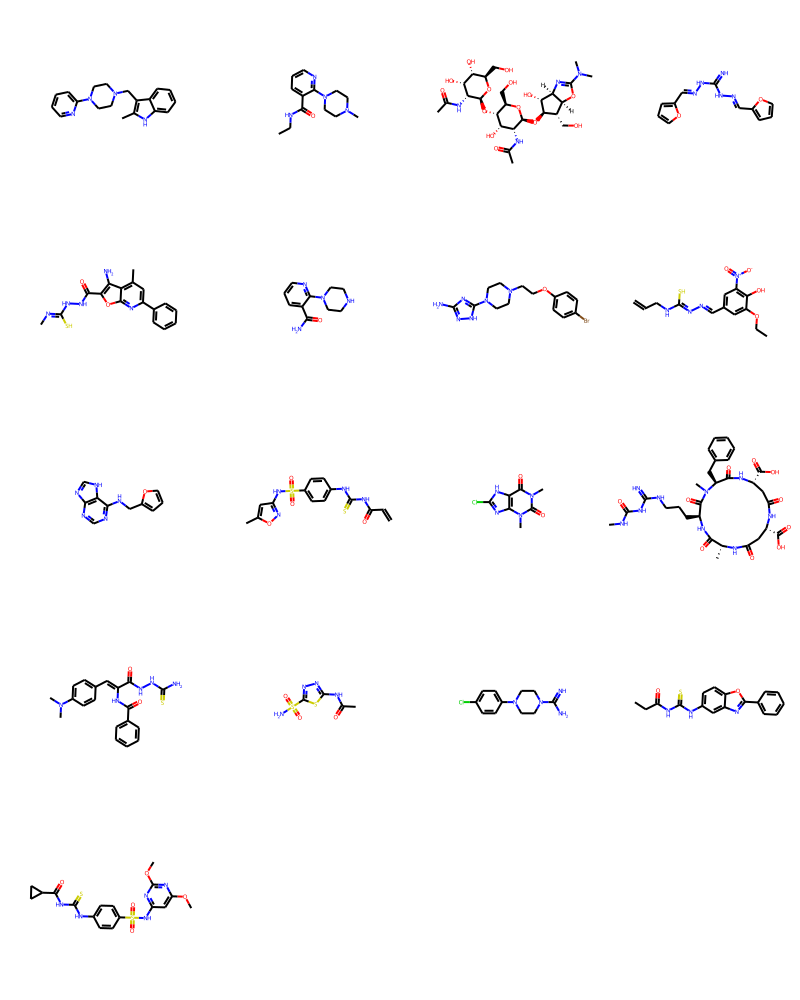

In [5]:
Draw.MolsToGridImage(ligandy, molsPerRow=4)

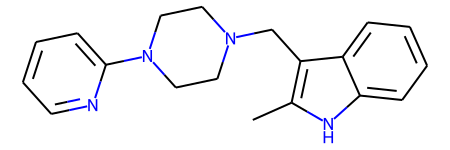

In [6]:
ligandy[0]

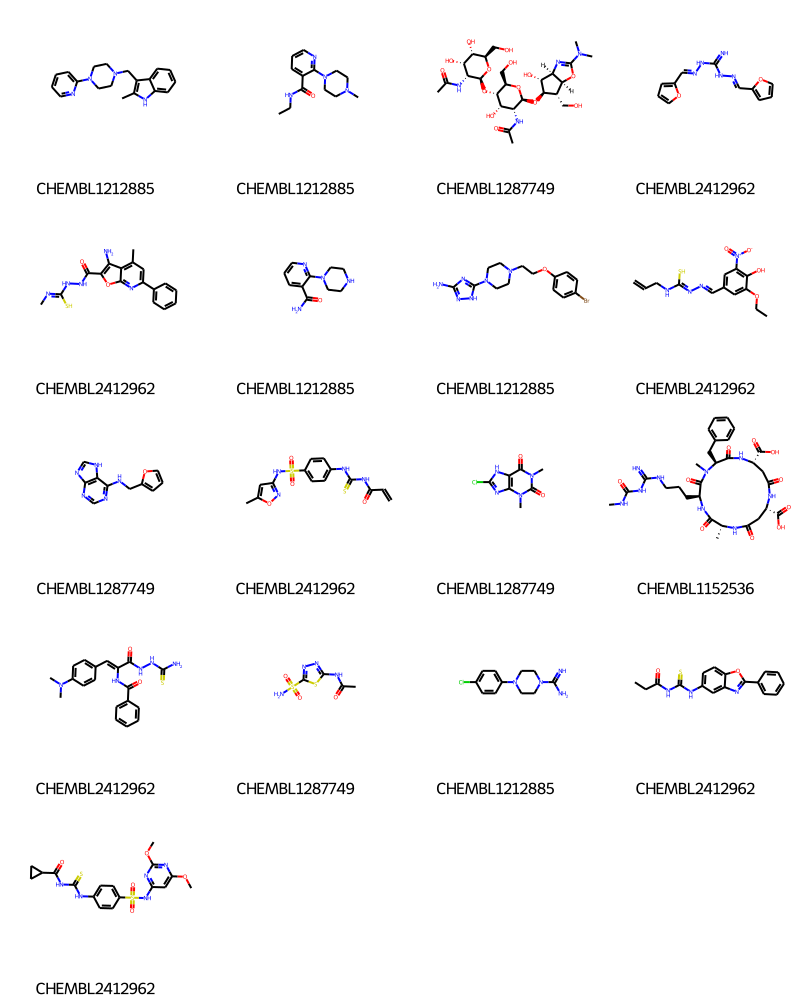

In [3]:
# wczytanie pliku z ligandami MACase w formacie SMI
suppl = Chem.SmilesMolSupplier('AMCase.smi', titleLine=False)
mols = [x for x in suppl if x is not None]
#len(mols)
img = Draw.MolsToGridImage(mols, molsPerRow=4,legends=[x.GetProp("_Name") for x in mols])
img


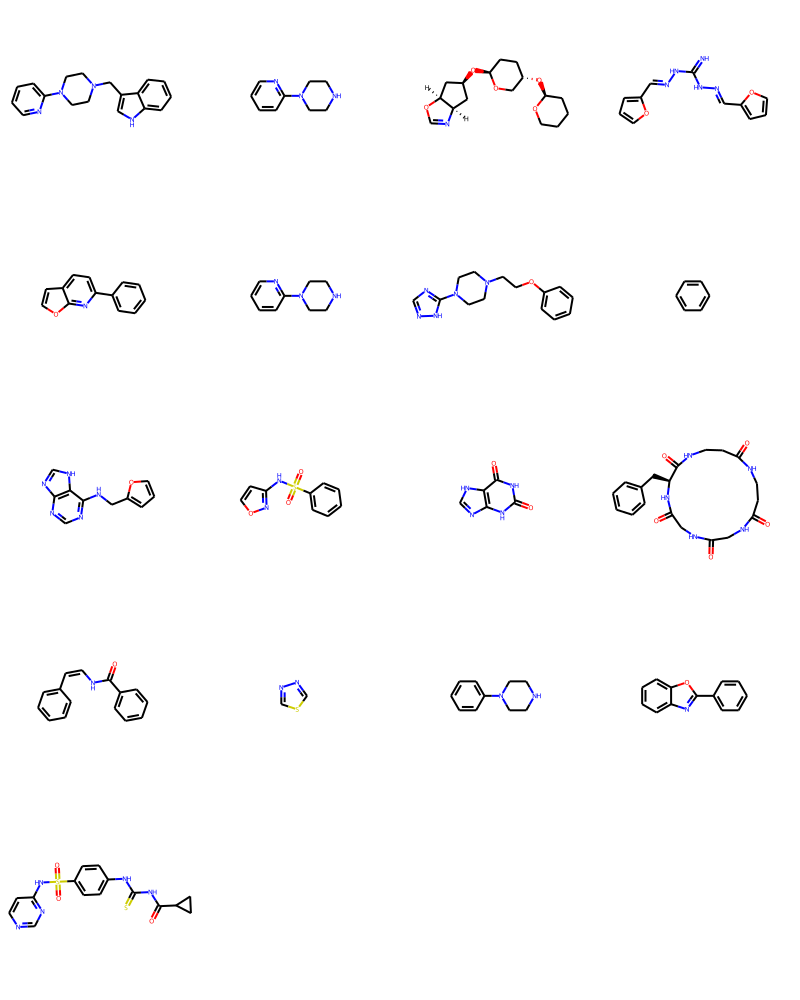

In [10]:
from rdkit.Chem.Scaffolds import MurckoScaffold

m1 = mols[1]
# rusztowania typu Murcko ligandow
scaffold = []

for i in range(len(mols)):
    x = MurckoScaffold.GetScaffoldForMol(mols[i])
    scaffold.append(x)  
    
Draw.MolsToGridImage(scaffold, molsPerRow=4)

In [11]:
core = []

for j in range(len(scaffold)):
    y = Chem.MolToSmiles(scaffold[j])   
    core.append(y)  

core

['c1ccc(N2CCN(Cc3c[nH]c4ccccc34)CC2)nc1',
 'c1ccc(N2CCNCC2)nc1',
 'C1=N[C@@H]2C[C@H](O[C@H]3CC[C@H](O[C@H]4CCCCO4)CO3)C[C@@H]2O1',
 'N=C(N/N=C/c1ccco1)N/N=C/c1ccco1',
 'c1ccc(-c2ccc3ccoc3n2)cc1',
 'c1ccc(N2CCNCC2)nc1',
 'c1ccc(OCCN2CCN(c3ncn[nH]3)CC2)cc1',
 'c1ccccc1',
 'c1coc(CNc2ncnc3nc[nH]c23)c1',
 'O=S(=O)(Nc1ccon1)c1ccccc1',
 'O=c1[nH]c(=O)c2[nH]cnc2[nH]1',
 'O=C1CCNC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O)CNC(=O)CCN1',
 'O=C(N/C=C\\c1ccccc1)c1ccccc1',
 'c1nncs1',
 'c1ccc(N2CCNCC2)cc1',
 'c1ccc(-c2nc3ccccc3o2)cc1',
 'O=C(NC(=S)Nc1ccc(S(=O)(=O)Nc2ccncn2)cc1)C1CC1']

In [12]:
#MAXIMUM COMMON SUBSTRUCTURE

from rdkit.Chem import rdFMCS 

In [13]:
#szukanie podstruktury
res = rdFMCS.FindMCS(ligandy)

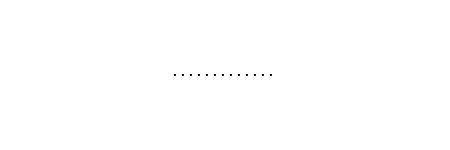

In [14]:
Chem.MolFromSmarts(res.smartsString)

In [15]:
res.smartsString

'[#6]-,:[#6]'

In [16]:
three_mol = [ligandy[1], ligandy[5],ligandy[14]]

In [17]:
res3 = rdFMCS.FindMCS(three_mol)

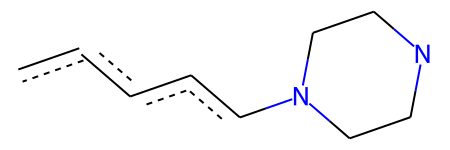

In [18]:
Chem.MolFromSmarts(res3.smartsString)

In [19]:
res3.smartsString

'[#6](:[#6]:[#6]:[#6]):[#6]-[#7]1-[#6]-[#6]-[#7]-[#6]-[#6]-1'

In [20]:
#FINGERPRINTS
#Znajdywanie podobieństwa z wykorzystaniem odcisków palców (fingerprint)

from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [21]:
fps = [FingerprintMols.FingerprintMol(x) for x in ligandy]

In [22]:
fps

In [23]:
DataStructs.FingerprintSimilarity(fps[0],fps[1]) #tanimoto

0.474120082815735

In [24]:
#TANIMOTO COEFFICIENT

for i in range(17):
    for j in range(17):
        k = round(DataStructs.FingerprintSimilarity(fps[i],fps[j]),2)
        if k >= 0.5 and k < 1:
            print(i, j, k)

0 5 0.53
1 5 0.88
1 14 0.5
5 0 0.53
5 1 0.88
9 16 0.52
14 1 0.5
16 9 0.52


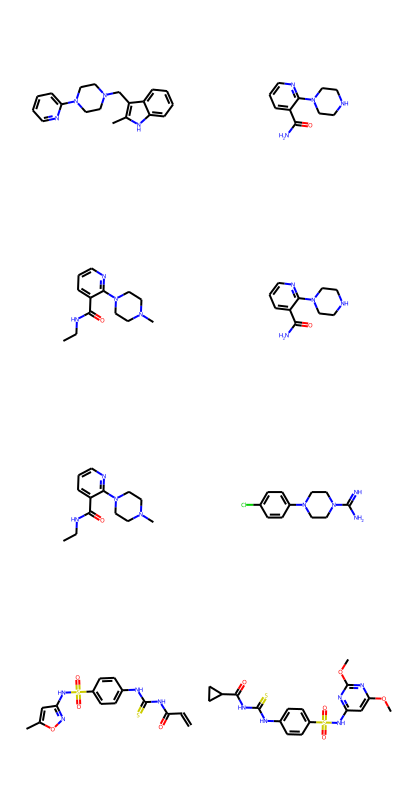

In [25]:
Chem.Draw.MolsToGridImage([ ligandy[0], ligandy[5], ligandy[1], ligandy[5],ligandy[1], ligandy[14], ligandy[9], ligandy[16] ],  molsPerRow=2)

In [26]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.6432584269662921

In [27]:
#DICE CoEFFICIENT

for i in range(17):
    for j in range(17):
        z = round(DataStructs.FingerprintSimilarity(fps[i], fps[j] , metric=DataStructs.DiceSimilarity),2)
        if z >= 0.66 and z < 1.0:
            print(i, j, z)

0 5 0.69
0 14 0.66
1 5 0.93
1 14 0.66
5 0 0.69
5 1 0.93
9 16 0.68
14 0 0.66
14 1 0.66
16 9 0.68


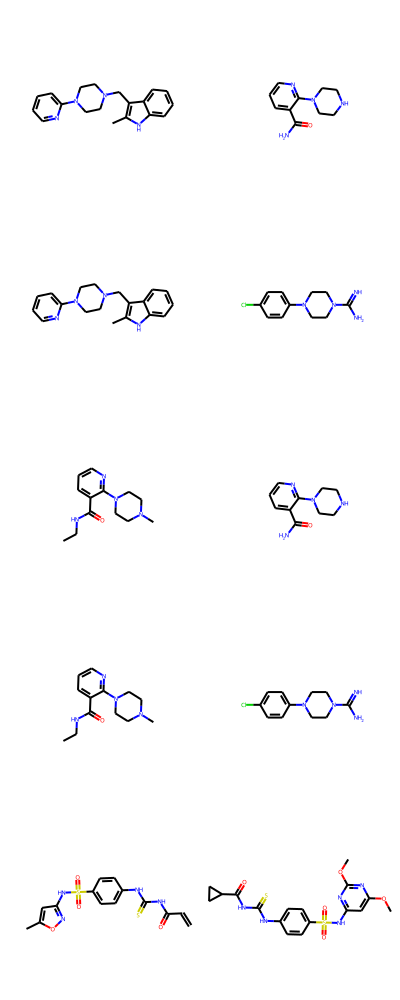

In [28]:
Chem.Draw.MolsToGridImage([ ligandy[0], ligandy[5],
                           ligandy[0], ligandy[14],
                           ligandy[1], ligandy[5],
                           ligandy[1], ligandy[14],
                           ligandy[9], ligandy[16] ], molsPerRow=2)

In [29]:
#ECFP fingerprint
#Extended Connectivity FingerPrint (Morgan) - Fingerprint Mograna

from rdkit.Chem import AllChem

In [30]:
fpc = [AllChem.GetMorganFingerprint(x , 2) for x in ligandy]

In [31]:
for i in range(17):
    for j in range(17):
        k = round(DataStructs.DiceSimilarity(fpc[i], fpc[j]),2)
        if k >= 0.5 and k < 1.0:
            print(i, j, k)

1 5 0.62
4 15 0.5
5 1 0.62
9 16 0.66
15 4 0.5
16 9 0.66


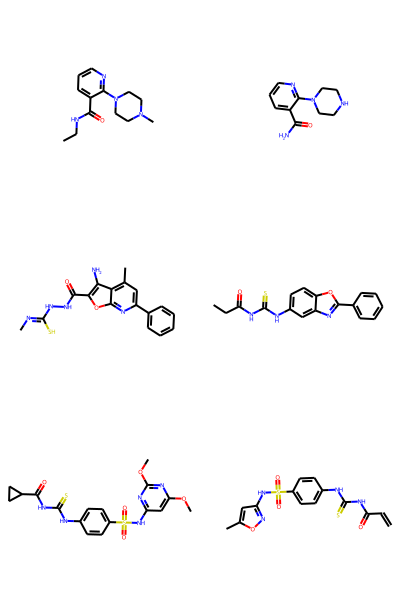

In [32]:
Chem.Draw.MolsToGridImage([ ligandy[1], ligandy[5],
                           ligandy[4], ligandy[15],
                           ligandy[16], ligandy[9] ], molsPerRow=2)

In [33]:
#SIMILARITY MAPS
#wizualizacji podobieństwa między molekułami

from rdkit.Chem.Draw import SimilarityMaps

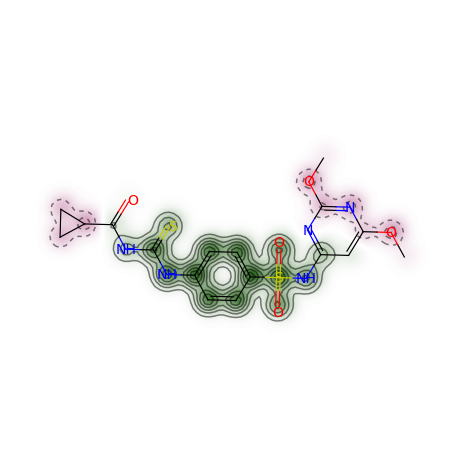

In [34]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ligandy[9], ligandy[16], SimilarityMaps.GetMorganFingerprint)

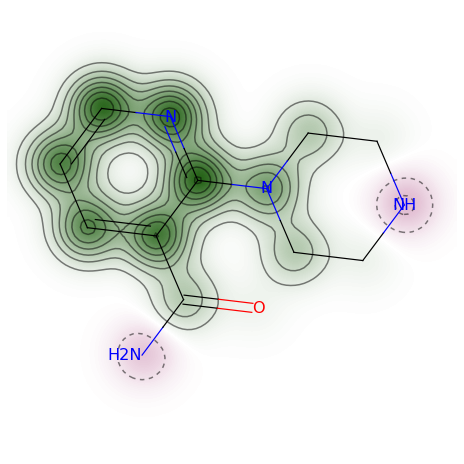

In [35]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ligandy[1], ligandy[5], SimilarityMaps.GetMorganFingerprint)

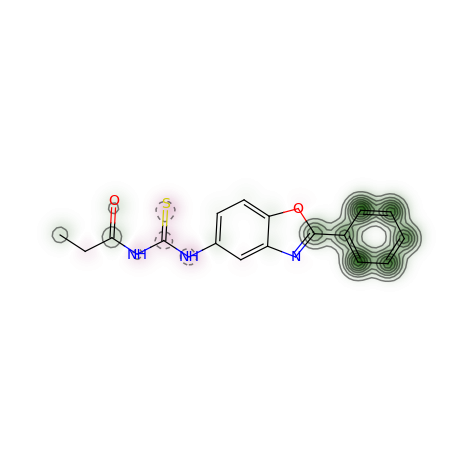

In [36]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ligandy[4], ligandy[15], SimilarityMaps.GetMorganFingerprint)